In [2]:
import pandas as pd
link = 'http://bit.ly/uforeports'
ufo = pd.read_csv(link)
ufo.columns

# reference using String
cols = ['City', 'State']

ufo = pd.read_csv(link, usecols=cols)
ufo.head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [4]:
# reference using position (Integer)
cols2 = [0, 4]

ufo = pd.read_csv(link, usecols=cols2)
ufo.head()

,City,Time
0,Ithaca,6/1/1930 22:00
1,Willingboro,6/30/1930 20:00
2,Holyoke,2/15/1931 14:00
3,Abilene,6/1/1931 13:00
4,New York Worlds Fair,4/18/1933 19:00


In [6]:
# if you only want certain number of rows
ufo = pd.read_csv(link, nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [7]:
# Iterating through a Series and DataFrame
# intuitive method
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


In [8]:
# pandas method
# you can grab index and row
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


In [10]:
link = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(link)
# you have 2 non-numeric columns
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [11]:
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [12]:
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Kyrgyzstan,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [13]:
# here you pass a list
# use shift + tab to know what arguments to pass in
list_include = ['object', 'float64']
drinks.describe(include=list_include)

,country,total_litres_of_pure_alcohol,continent
count,193,193.000000,193
unique,193,NaN,6
top,Kyrgyzstan,NaN,Africa
freq,1,NaN,53
mean,NaN,4.717098,NaN
std,NaN,3.773298,NaN
min,NaN,0.000000,NaN
25%,NaN,1.300000,NaN
50%,NaN,4.200000,NaN
75%,NaN,7.200000,NaN


In [14]:
import pandas as pd
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [15]:
# let's remove "continent" column
# axis=1 drops the column
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [16]:
# drops second row
# axis=0 drops the row
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [17]:
# drops multiple rows
drop_rows = [0, 1]
drinks.drop(drop_rows, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America


In [18]:
# mean of each numeric column
drinks.mean()

# it is the same as the following command as axis=0 is the default
# drinks.mean(axis=0)
# it instructs pandas to move vertically

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [21]:
# mean of each row
# drinks.mean(axis='columns')
drinks.mean(axis=1).head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

In [22]:
drinks.mean(axis='index').head()
# this is the same as 
# drinks.mean(axis=0).head()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [23]:
# https://www.ritchieng.com/pandas-string-methods/
# convert string to uppercase in Python
'hello'.upper()

'HELLO'

In [24]:
import pandas as pd
url = 'http://bit.ly/chiporders'
orders = pd.read_table(url)
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [25]:
# .str is a string method
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [27]:
# you can overwrite with the following code
orders.item_name = orders.item_name.str.upper()
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,CHIPS AND FRESH TOMATO SALSA,NaN,$2.39
1,1,1,IZZE,[Clementine],$3.39
2,1,1,NANTUCKET NECTAR,[Apple],$3.39
3,1,1,CHIPS AND TOMATILLO-GREEN CHILI SALSA,NaN,$2.39
4,2,2,CHICKEN BOWL,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [28]:
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4    False
Name: item_name, dtype: bool

In [29]:
# replacing elements
orders.choice_description.str.replace('[', '').head()

0                                                  NaN
1                                          Clementine]
2                                               Apple]
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [30]:
# chain string methods
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [31]:
# using regex to simplify the code above
orders.choice_description.str.replace('[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [32]:
# https://www.ritchieng.com/pandas-changing-datatype/
import pandas as pd
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [33]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [35]:
# Method 1: Change datatype after reading the csv

# to change use .astype() 
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [37]:
# Method 2: Change datatype before reading the csv

drinks = pd.read_csv(url, dtype={'spirit_servings':float})
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                 float64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [42]:
url = 'http://bit.ly/chiporders'
orders = pd.read_table(url)
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [43]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [44]:
# The issue here is how pandas don't recognize item_price as a floating object
orders.item_price.mean()

TypeError: Could not convert $2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $1.69 $17.50 $4.45 $8.49 $2.39 $17.50 $4.45 $4.45 $11.25 $11.75 $10.98 $8.49 $10.98 $2.18 $11.48 $8.49 $2.39 $4.45 $11.25 $11.75 $8.75 $8.49 $2.18 $8.49 $3.39 $8.49 $8.99 $10.98 $11.48 $8.49 $1.09 $1.09 $9.25 $8.75 $2.95 $9.25 $4.45 $11.25 $11.48 $8.49 $8.49 $8.99 $2.39 $11.25 $8.75 $2.95 $1.09 $8.99 $8.49 $2.39 $10.98 $1.09 $3.99 $11.25 $8.75 $8.49 $3.39 $8.75 $9.25 $2.15 $11.25 $11.25 $11.25 $4.45 $22.50 $4.45 $11.75 $8.75 $17.50 $8.75 $9.25 $8.75 $2.15 $9.25 $4.30 $8.75 $11.25 $2.15 $8.99 $1.09 $8.99 $3.99 $8.75 $2.95 $2.95 $11.75 $5.90 $9.25 $9.25 $11.75 $9.25 $2.95 $17.50 $8.75 $9.25 $10.98 $8.99 $1.09 $1.09 $1.09 $8.99 $10.98 $1.09 $8.75 $8.75 $9.25 $9.25 $8.75 $8.75 $8.99 $8.99 $8.99 $1.09 $11.75 $1.25 $8.99 $2.39 $9.25 $2.95 $8.99 $3.99 $8.49 $2.39 $8.49 $8.49 $8.49 $1.69 $8.49 $3.99 $8.99 $1.69 $1.09 $23.78 $17.50 $2.15 $8.75 $9.25 $9.25 $8.75 $4.45 $8.75 $11.25 $11.25 $1.25 $9.25 $4.45 $11.25 $11.75 $11.75 $6.49 $8.99 $2.39 $8.49 $2.39 $11.25 $8.75 $2.15 $8.99 $1.69 $8.75 $11.25 $2.15 $4.45 $8.75 $8.49 $8.99 $17.50 $8.49 $1.09 $1.09 $8.75 $1.25 $2.15 $11.08 $8.49 $8.49 $8.99 $2.39 $8.75 $2.15 $1.50 $11.25 $2.15 $8.49 $8.49 $11.75 $9.25 $11.75 $1.25 $11.25 $8.75 $4.45 $6.49 $9.25 $2.95 $11.25 $4.45 $1.25 $1.25 $8.49 $2.39 $2.18 $8.49 $2.18 $22.16 $17.50 $8.75 $2.95 $6.49 $8.99 $3.39 $3.39 $8.99 $8.49 $11.25 $2.15 $11.25 $2.95 $11.25 $1.25 $8.99 $1.09 $8.75 $8.75 $9.25 $2.95 $11.75 $1.50 $8.99 $1.09 $11.25 $1.25 $1.25 $11.25 $11.75 $2.15 $8.99 $1.69 $11.75 $6.49 $8.75 $9.25 $11.25 $4.45 $1.25 $11.25 $4.45 $8.49 $8.99 $8.49 $8.99 $11.25 $1.25 $11.75 $1.25 $11.75 $9.25 $4.45 $11.25 $2.15 $32.94 $1.25 $11.25 $11.48 $1.69 $1.09 $17.50 $4.45 $6.49 $9.25 $8.75 $9.25 $9.25 $8.75 $8.75 $2.15 $2.95 $17.50 $10.98 $11.48 $11.48 $3.39 $8.99 $1.69 $8.99 $1.09 $10.98 $3.39 $8.99 $1.09 $9.25 $8.75 $11.25 $4.45 $2.95 $9.25 $22.20 $8.49 $8.99 $8.75 $8.75 $11.75 $8.75 $11.25 $9.25 $11.25 $11.25 $8.75 $11.25 $2.95 $1.25 $8.49 $1.69 $11.75 $11.25 $8.75 $8.75 $4.45 $8.49 $3.99 $8.49 $3.99 $11.48 $1.69 $1.09 $11.25 $1.50 $10.58 $1.69 $9.25 $11.25 $8.75 $9.25 $11.25 $11.25 $8.75 $11.75 $8.75 $8.75 $8.75 $2.15 $11.25 $11.75 $2.50 $4.45 $9.25 $4.45 $11.25 $8.49 $3.99 $9.25 $9.25 $11.25 $9.25 $11.75 $11.25 $1.25 $23.50 $1.25 $8.99 $8.49 $7.40 $7.40 $8.75 $1.25 $4.45 $8.75 $2.15 $8.75 $4.45 $7.40 $7.40 $7.40 $8.99 $3.99 $8.99 $1.69 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $2.95 $8.75 $18.50 $8.49 $3.99 $2.95 $9.25 $9.25 $3.00 $1.25 $8.75 $9.25 $4.45 $8.75 $11.25 $4.45 $10.98 $22.16 $4.45 $8.75 $9.25 $6.49 $9.25 $11.25 $8.75 $9.25 $2.15 $9.25 $4.45 $9.25 $2.95 $9.25 $8.75 $9.25 $1.25 $1.25 $8.75 $8.75 $9.25 $4.45 $11.75 $11.75 $11.75 $9.25 $9.25 $16.98 $2.39 $3.39 $3.39 $9.25 $11.75 $11.25 $2.15 $8.75 $9.25 $4.45 $10.98 $11.25 $9.25 $22.50 $9.25 $2.95 $1.50 $11.48 $8.49 $1.69 $8.49 $8.49 $8.49 $6.78 $11.75 $4.45 $8.75 $4.45 $11.89 $9.39 $8.75 $2.95 $1.25 $9.25 $8.75 $23.78 $8.75 $9.25 $2.15 $2.15 $1.25 $8.49 $3.99 $10.98 $1.09 $8.75 $4.45 $8.75 $11.75 $2.95 $4.45 $9.25 $8.75 $8.49 $3.99 $22.50 $11.25 $1.25 $8.75 $8.75 $18.50 $6.49 $8.75 $8.75 $4.45 $8.49 $3.99 $8.99 $1.09 $8.49 $2.39 $11.48 $1.69 $2.50 $9.25 $1.50 $17.50 $2.95 $8.75 $4.45 $11.75 $8.75 $8.49 $1.69 $8.49 $3.99 $8.99 $8.99 $3.99 $8.99 $11.25 $4.45 $1.25 $3.99 $10.98 $7.40 $3.00 $7.40 $4.00 $8.49 $3.99 $9.25 $4.45 $11.25 $1.25 $11.75 $1.25 $11.25 $2.15 $11.25 $4.45 $3.75 $11.75 $8.99 $2.39 $8.75 $4.45 $1.25 $8.99 $8.49 $2.18 $8.49 $2.18 $1.09 $8.75 $2.95 $1.25 $1.50 $11.25 $9.25 $2.95 $1.25 $8.49 $3.99 $11.48 $3.99 $8.49 $11.25 $1.25 $8.99 $1.69 $11.25 $1.25 $6.49 $8.75 $9.25 $8.75 $2.95 $8.75 $11.75 $8.69 $8.69 $2.29 $3.99 $8.49 $8.75 $8.75 $1.25 $11.75 $11.25 $11.25 $11.25 $1.25 $9.25 $11.75 $6.49 $3.99 $8.49 $11.25 $2.15 $11.25 $11.89 $8.99 $1.69 $8.99 $8.99 $3.99 $8.99 $9.25 $9.25 $2.15 $7.40 $7.40 $8.75 $8.75 $9.25 $4.45 $11.25 $1.25 $11.75 $11.25 $1.25 $3.99 $8.49 $8.49 $8.49 $8.99 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $8.75 $2.95 $1.25 $9.25 $1.25 $2.15 $11.25 $1.25 $4.45 $8.75 $2.50 $8.90 $8.75 $8.75 $8.75 $11.25 $11.25 $10.98 $3.99 $10.98 $3.99 $1.69 $8.99 $9.25 $8.75 $8.99 $1.09 $9.25 $2.95 $8.75 $9.25 $3.99 $8.49 $8.75 $8.75 $22.50 $10.98 $3.27 $3.99 $8.99 $1.09 $11.08 $8.75 $4.45 $11.08 $3.99 $8.49 $4.30 $9.25 $8.75 $11.25 $11.25 $9.25 $8.49 $8.99 $8.49 $8.75 $2.95 $4.45 $9.25 $2.95 $9.25 $8.75 $11.25 $4.45 $16.98 $8.49 $2.39 $11.25 $3.75 $9.25 $4.45 $9.25 $9.25 $4.45 $8.75 $9.25 $8.75 $9.25 $9.25 $9.25 $11.48 $8.99 $22.50 $11.75 $11.25 $1.25 $8.75 $2.15 $1.25 $11.25 $8.75 $1.25 $11.25 $1.50 $11.25 $11.25 $9.25 $6.49 $8.90 $8.75 $4.45 $11.25 $1.25 $17.50 $9.25 $8.75 $11.75 $3.00 $8.49 $8.49 $10.98 $8.99 $3.99 $8.75 $4.45 $8.99 $1.69 $11.75 $8.75 $11.25 $4.45 $11.75 $1.25 $11.75 $2.95 $8.99 $8.99 $2.18 $17.98 $8.99 $8.49 $1.69 $11.75 $11.25 $2.95 $3.75 $9.25 $11.75 $8.75 $2.15 $1.50 $8.49 $8.49 $3.39 $8.69 $3.89 $8.75 $4.45 $8.75 $11.25 $2.15 $8.75 $8.49 $1.69 $8.49 $8.49 $1.25 $8.75 $11.75 $11.75 $8.99 $1.09 $8.75 $4.45 $8.75 $2.95 $8.75 $2.15 $3.99 $8.49 $8.99 $3.99 $8.49 $1.69 $1.09 $8.99 $1.09 $9.25 $8.75 $8.99 $2.39 $1.25 $1.25 $11.25 $11.25 $9.25 $9.25 $11.25 $1.50 $3.99 $8.49 $11.25 $9.25 $11.25 $17.50 $8.75 $8.90 $8.75 $8.75 $8.99 $2.39 $11.25 $9.25 $2.15 $11.25 $1.25 $11.75 $1.25 $11.25 $11.75 $1.25 $11.25 $11.25 $8.49 $10.98 $8.75 $1.25 $8.75 $8.49 $8.49 $1.50 $1.50 $8.75 $4.45 $11.25 $1.25 $11.75 $8.49 $2.39 $9.25 $4.45 $9.25 $8.75 $8.99 $1.69 $17.50 $2.39 $8.99 $8.99 $11.25 $4.45 $8.75 $4.45 $9.25 $6.49 $10.98 $8.49 $8.49 $1.09 $1.69 $9.25 $4.45 $8.75 $1.25 $2.95 $3.99 $8.49 $11.75 $11.75 $2.15 $11.48 $8.75 $2.15 $1.25 $11.25 $2.15 $1.25 $8.75 $8.75 $6.49 $1.69 $8.99 $8.75 $11.75 $10.98 $1.09 $8.49 $3.39 $8.75 $2.15 $1.25 $11.48 $10.98 $10.98 $8.49 $2.95 $9.25 $9.25 $11.75 $4.45 $11.48 $11.25 $8.75 $4.45 $1.69 $8.99 $8.75 $4.45 $1.50 $11.75 $2.15 $8.99 $2.39 $8.75 $2.95 $1.25 $8.75 $2.15 $1.25 $2.18 $2.18 $11.48 $8.75 $2.95 $11.75 $11.75 $1.25 $10.58 $8.99 $2.39 $11.75 $4.45 $11.25 $11.25 $17.50 $8.75 $8.75 $8.75 $22.50 $9.25 $8.75 $4.45 $11.75 $1.25 $11.25 $11.25 $2.95 $8.99 $1.69 $11.25 $4.45 $8.75 $6.49 $8.75 $4.45 $9.25 $4.45 $11.75 $11.75 $4.45 $11.89 $11.75 $11.25 $2.95 $1.50 $4.45 $8.75 $8.99 $1.09 $8.99 $1.09 $3.99 $11.48 $8.49 $9.25 $4.45 $11.48 $9.25 $2.95 $9.25 $8.49 $8.99 $8.99 $8.49 $8.75 $2.95 $4.45 $11.89 $10.58 $8.19 $1.69 $8.75 $2.15 $1.25 $17.50 $6.49 $9.25 $2.15 $8.75 $4.45 $8.75 $1.25 $11.48 $11.48 $8.99 $2.18 $8.49 $8.99 $2.39 $2.39 $2.18 $8.75 $4.45 $11.25 $9.25 $9.25 $11.25 $11.25 $4.45 $2.95 $11.75 $8.49 $8.49 $8.99 $1.69 $9.25 $11.25 $11.75 $9.25 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $10.98 $11.25 $4.45 $10.98 $8.49 $8.99 $3.39 $3.99 $8.99 $1.09 $1.09 $2.39 $17.50 $4.45 $11.25 $11.25 $4.45 $9.25 $4.45 $8.75 $2.15 $1.25 $11.89 $2.95 $11.75 $1.25 $11.25 $4.45 $11.48 $11.48 $2.95 $9.25 $8.75 $9.25 $2.95 $11.25 $1.25 $11.75 $1.25 $8.99 $2.39 $1.25 $11.25 $1.25 $11.25 $8.49 $3.99 $35.00 $27.75 $8.75 $11.80 $8.90 $5.90 $6.49 $10.98 $17.98 $2.39 $9.25 $8.75 $2.15 $8.75 $4.45 $8.49 $1.69 $8.19 $8.69 $10.98 $3.99 $11.48 $11.48 $4.45 $8.75 $6.49 $8.75 $8.75 $9.25 $1.25 $4.45 $8.49 $1.69 $9.25 $4.45 $8.99 $1.09 $11.25 $2.95 $11.08 $11.08 $3.89 $10.98 $11.25 $8.75 $11.25 $9.25 $4.30 $8.75 $8.49 $3.99 $1.69 $8.99 $8.49 $1.69 $11.75 $11.25 $11.89 $9.25 $2.95 $9.25 $2.95 $8.75 $4.45 $4.45 $8.75 $10.98 $11.48 $8.49 $9.25 $4.45 $11.75 $11.89 $8.99 $8.49 $8.75 $9.25 $8.75 $8.75 $11.75 $11.75 $4.45 $11.25 $11.75 $2.50 $8.99 $1.69 $11.75 $2.15 $1.25 $9.25 $8.75 $8.90 $9.25 $2.95 $8.75 $11.25 $8.90 $11.25 $11.75 $11.48 $1.69 $3.39 $9.25 $2.95 $8.99 $1.69 $8.49 $10.98 $11.25 $2.95 $8.99 $1.69 $8.75 $2.15 $1.25 $8.75 $2.95 $9.25 $2.50 $11.25 $1.25 $11.75 $2.50 $11.25 $1.50 $8.75 $1.25 $2.95 $11.48 $11.48 $8.75 $8.75 $2.15 $11.75 $1.25 $9.25 $9.25 $6.49 $11.75 $8.49 $8.49 $1.09 $10.98 $8.75 $1.25 $2.15 $11.25 $1.50 $11.25 $11.25 $8.49 $8.49 $8.75 $1.50 $1.25 $1.50 $8.75 $2.50 $2.15 $7.40 $7.40 $4.00 $9.25 $9.39 $9.25 $9.25 $9.39 $11.25 $8.90 $11.25 $6.00 $11.25 $11.25 $11.25 $22.50 $11.48 $1.09 $8.49 $8.49 $17.50 $11.25 $1.50 $9.25 $8.75 $3.99 $8.49 $8.75 $8.75 $8.75 $8.75 $8.75 $11.75 $1.50 $11.25 $11.25 $2.95 $8.99 $10.98 $9.25 $8.75 $4.45 $8.49 $1.09 $2.39 $8.75 $8.75 $11.48 $8.99 $8.49 $8.49 $2.39 $10.98 $8.49 $3.99 $11.75 $4.45 $8.75 $2.15 $1.25 $10.98 $8.99 $11.25 $1.50 $8.75 $2.15 $1.25 $8.75 $9.25 $8.75 $11.25 $1.50 $8.75 $1.25 $4.45 $10.98 $8.75 $2.95 $1.25 $8.75 $2.95 $1.25 $8.49 $8.49 $2.39 $11.25 $1.25 $8.75 $8.75 $9.25 $8.75 $11.89 $1.25 $8.75 $2.15 $1.25 $8.99 $1.09 $8.75 $4.45 $26.25 $8.75 $4.45 $11.75 $2.95 $8.75 $8.75 $11.75 $8.75 $11.25 $11.25 $11.25 $4.45 $1.25 $8.49 $8.49 $8.49 $8.99 $8.99 $2.39 $2.39 $3.99 $8.75 $4.45 $2.15 $9.25 $1.25 $11.25 $11.75 $8.75 $4.45 $11.25 $2.15 $8.75 $4.45 $8.75 $8.75 $1.25 $11.25 $2.15 $8.75 $5.90 $11.75 $1.25 $9.25 $3.75 $8.75 $1.25 $4.45 $11.75 $4.45 $8.75 $23.50 $8.75 $2.95 $8.75 $8.75 $11.89 $4.45 $2.95 $1.25 $8.75 $4.45 $2.95 $1.25 $8.75 $2.15 $1.25 $11.75 $2.95 $8.99 $3.39 $9.25 $9.25 $17.50 $2.95 $11.89 $1.50 $11.25 $2.95 $9.25 $11.25 $11.25 $2.95 $8.75 $9.25 $4.30 $8.75 $8.75 $11.25 $8.75 $4.30 $8.75 $1.25 $2.15 $8.49 $8.49 $3.39 $3.39 $10.98 $10.98 $2.39 $11.25 $11.75 $11.75 $1.25 $5.90 $8.75 $11.25 $9.25 $4.45 $1.50 $3.39 $8.99 $2.39 $11.25 $2.15 $11.25 $11.75 $11.75 $4.45 $11.75 $4.45 $9.25 $8.75 $8.49 $8.99 $8.49 $8.99 $11.75 $8.75 $8.49 $3.99 $3.89 $11.08 $8.49 $8.99 $8.49 $8.49 $8.49 $11.25 $2.15 $17.50 $8.75 $2.95 $8.49 $8.49 $10.98 $1.09 $11.25 $2.15 $2.95 $1.25 $8.75 $9.25 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $8.99 $3.99 $11.75 $2.15 $8.99 $3.39 $9.25 $8.75 $11.25 $11.25 $4.45 $8.75 $2.15 $1.25 $11.75 $4.45 $9.25 $2.95 $8.49 $8.49 $11.25 $8.75 $4.45 $11.25 $11.25 $11.25 $11.25 $4.45 $8.49 $1.69 $8.49 $3.39 $8.75 $11.25 $9.25 $8.75 $11.25 $11.25 $11.75 $11.25 $11.75 $11.25 $11.75 $21.96 $10.98 $1.69 $11.48 $8.99 $8.49 $1.69 $9.25 $2.15 $1.50 $11.25 $1.50 $8.75 $8.75 $2.95 $8.49 $1.69 $8.75 $2.95 $1.25 $11.25 $2.15 $11.08 $8.49 $8.49 $8.49 $11.75 $1.25 $11.75 $8.75 $8.75 $8.75 $4.45 $11.25 $1.50 $23.50 $11.75 $6.49 $8.75 $4.45 $6.49 $8.75 $2.50 $2.15 $8.49 $2.39 $8.75 $11.75 $4.45 $8.99 $10.98 $9.25 $2.95 $9.25 $9.25 $11.75 $8.75 $8.75 $8.75 $10.98 $11.25 $9.25 $8.75 $8.75 $2.15 $11.25 $2.15 $4.45 $11.75 $8.49 $2.39 $9.25 $1.25 $1.25 $1.25 $1.25 $8.75 $2.15 $8.49 $1.69 $11.25 $1.50 $8.75 $8.75 $8.49 $3.99 $8.99 $1.09 $11.25 $1.25 $8.49 $2.39 $8.49 $8.75 $9.25 $11.25 $4.45 $11.25 $11.89 $8.99 $8.49 $8.75 $4.45 $8.75 $11.75 $11.75 $8.90 $9.39 $2.95 $8.49 $3.99 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $8.75 $4.45 $8.49 $8.99 $8.49 $3.99 $8.75 $8.75 $2.95 $8.75 $17.50 $9.25 $2.95 $8.75 $6.49 $4.30 $8.75 $8.75 $2.15 $1.50 $8.49 $8.49 $2.39 $9.25 $4.45 $6.49 $11.75 $4.45 $10.98 $1.69 $9.39 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $11.25 $9.25 $8.75 $11.25 $8.75 $11.25 $2.50 $2.50 $6.00 $8.90 $5.90 $11.25 $11.25 $8.49 $10.98 $8.75 $2.15 $1.50 $9.25 $1.25 $1.50 $2.15 $1.25 $8.75 $2.95 $8.49 $3.99 $11.25 $4.30 $11.75 $2.15 $18.50 $8.49 $2.39 $8.75 $4.45 $11.75 $8.99 $3.99 $9.25 $9.25 $1.50 $8.75 $2.95 $6.49 $11.75 $8.49 $8.99 $8.75 $4.45 $6.49 $22.50 $9.25 $2.95 $8.49 $1.69 $10.98 $8.75 $4.45 $11.25 $2.95 $8.99 $8.49 $2.39 $11.75 $6.49 $11.25 $11.75 $2.95 $8.99 $1.69 $8.99 $2.18 $1.09 $8.99 $8.99 $1.09 $8.99 $8.99 $8.49 $10.98 $1.09 $11.75 $9.25 $11.25 $11.25 $2.15 $11.25 $8.75 $4.45 $2.95 $11.75 $1.50 $8.99 $10.98 $2.39 $8.75 $2.15 $9.25 $1.50 $8.75 $2.15 $3.99 $8.99 $6.49 $8.75 $8.90 $8.99 $3.99 $17.50 $11.25 $1.25 $10.98 $9.25 $4.45 $1.25 $3.00 $11.25 $4.45 $4.45 $2.95 $9.25 $11.25 $2.15 $11.25 $11.25 $4.45 $2.95 $9.25 $11.25 $1.25 $8.75 $2.95 $1.25 $8.75 $4.45 $11.48 $11.48 $8.49 $2.39 $11.25 $11.75 $2.15 $1.50 $2.15 $8.75 $11.25 $8.90 $11.25 $11.25 $1.25 $4.45 $9.25 $9.25 $8.75 $9.25 $8.75 $8.75 $9.25 $8.75 $11.75 $11.75 $8.75 $8.75 $8.90 $2.95 $10.98 $8.49 $8.49 $10.98 $8.99 $8.99 $11.75 $17.50 $11.75 $3.99 $8.49 $10.98 $1.69 $17.50 $8.99 $2.39 $8.99 $2.39 $1.25 $8.75 $2.95 $11.75 $11.25 $17.50 $8.49 $8.49 $2.39 $11.25 $1.50 $8.75 $3.00 $1.25 $8.75 $4.45 $11.75 $11.75 $4.45 $21.96 $8.75 $4.45 $8.75 $11.25 $9.25 $8.99 $2.39 $9.25 $8.75 $10.98 $8.49 $3.99 $3.39 $11.75 $1.50 $4.45 $9.25 $8.75 $1.25 $11.75 $8.75 $1.50 $8.75 $8.75 $2.15 $1.50 $8.75 $2.95 $8.75 $8.75 $17.50 $8.75 $6.49 $4.45 $11.25 $11.25 $4.30 $8.75 $11.25 $4.45 $8.99 $2.39 $9.25 $9.25 $9.25 $4.45 $11.75 $11.25 $2.95 $2.15 $11.25 $11.25 $8.75 $2.15 $1.50 $9.25 $4.45 $10.98 $8.99 $2.18 $8.75 $4.45 $1.25 $8.99 $2.39 $4.45 $8.75 $10.98 $11.75 $1.50 $10.98 $8.99 $8.49 $3.99 $8.99 $8.49 $3.99 $8.49 $8.49 $8.99 $11.25 $11.25 $10.98 $10.98 $10.98 $2.39 $3.39 $8.75 $1.25 $2.95 $11.75 $1.50 $10.98 $1.69 $4.45 $8.75 $8.75 $8.75 $8.75 $4.45 $9.25 $8.75 $11.25 $8.75 $3.99 $8.99 $8.49 $11.25 $11.25 $8.75 $4.45 $8.75 $4.45 $1.25 $8.75 $8.75 $1.50 $2.15 $11.75 $11.75 $11.75 $11.75 $11.75 $1.50 $8.75 $9.25 $1.25 $8.75 $2.15 $8.99 $1.09 $4.45 $11.25 $11.75 $2.15 $8.75 $8.75 $1.25 $9.25 $2.15 $11.75 $11.25 $8.75 $11.25 $4.45 $8.49 $1.69 $8.75 $8.75 $8.99 $8.49 $9.25 $11.25 $2.95 $4.45 $11.75 $6.49 $11.48 $8.99 $4.36 $11.48 $8.99 $8.49 $11.48 $8.75 $2.15 $1.50 $8.99 $1.69 $11.25 $1.25 $9.25 $9.25 $8.75 $9.25 $8.90 $2.15 $9.25 $10.98 $8.49 $8.75 $9.25 $4.30 $9.25 $8.75 $8.75 $2.15 $1.25 $8.75 $1.25 $8.75 $5.90 $9.25 $8.75 $9.25 $4.45 $9.25 $11.75 $2.50 $9.25 $2.15 $9.25 $1.50 $1.25 $11.25 $2.95 $8.75 $8.75 $8.75 $10.98 $8.75 $8.75 $8.75 $2.15 $1.25 $10.98 $8.75 $2.15 $1.50 $8.75 $2.95 $1.25 $9.25 $9.25 $8.49 $2.39 $8.75 $4.45 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.99 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $11.25 $11.25 $8.75 $1.50 $2.15 $16.98 $11.75 $1.50 $8.75 $4.30 $1.50 $8.75 $2.95 $1.25 $1.25 $9.25 $4.45 $11.25 $8.75 $4.45 $8.75 $2.15 $1.25 $10.98 $1.69 $8.75 $1.25 $8.75 $1.25 $11.25 $8.75 $8.75 $8.49 $1.69 $9.25 $11.75 $8.49 $2.39 $9.25 $2.95 $6.49 $8.75 $8.75 $9.25 $8.75 $6.78 $17.98 $3.39 $11.75 $11.25 $8.75 $4.45 $11.75 $9.25 $8.75 $6.49 $8.99 $2.39 $8.75 $11.25 $11.75 $4.45 $8.75 $2.15 $9.25 $9.25 $9.25 $11.89 $11.75 $11.25 $9.25 $9.25 $8.75 $8.75 $8.49 $1.69 $1.09 $11.25 $1.50 $11.25 $11.25 $11.75 $1.50 $8.49 $8.99 $22.50 $8.75 $4.30 $8.75 $11.25 $2.15 $11.25 $2.95 $4.45 $11.25 $8.49 $3.39 $2.39 $11.75 $2.15 $11.75 $8.99 $2.39 $8.75 $11.75 $11.89 $1.25 $7.50 $11.89 $1.09 $8.49 $2.39 $8.75 $8.75 $8.75 $8.75 $9.25 $11.25 $8.75 $8.90 $9.25 $8.75 $8.75 $11.75 $3.00 $1.50 $11.25 $11.75 $8.99 $10.98 $4.45 $8.75 $2.15 $9.25 $11.25 $4.45 $1.69 $10.98 $9.25 $11.75 $9.25 $4.45 $10.98 $3.99 $8.49 $1.25 $9.25 $4.45 $10.98 $8.75 $8.75 $11.75 $11.25 $8.49 $11.48 $4.45 $1.25 $11.25 $8.99 $1.09 $2.39 $11.25 $2.15 $8.75 $4.45 $8.49 $1.69 $10.98 $1.69 $9.25 $4.45 $11.25 $8.75 $11.25 $11.75 $11.25 $22.50 $8.49 $2.39 $2.50 $8.75 $8.75 $9.25 $9.25 $11.25 $8.99 $1.09 $8.99 $1.69 $11.75 $1.25 $21.96 $8.75 $2.15 $1.25 $8.75 $11.25 $9.25 $11.25 $8.75 $8.75 $11.25 $2.15 $8.99 $1.09 $1.69 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $11.48 $8.49 $8.49 $4.78 $9.25 $1.25 $1.25 $1.25 $11.25 $11.25 $11.75 $4.45 $11.25 $4.45 $8.99 $1.09 $11.25 $2.15 $11.25 $9.25 $11.75 $11.25 $11.25 $9.25 $2.95 $11.25 $4.45 $8.75 $2.95 $2.95 $11.25 $1.50 $10.98 $16.98 $18.50 $10.98 $3.99 $1.09 $9.25 $9.25 $8.75 $4.45 $17.50 $8.75 $4.45 $8.75 $1.25 $4.45 $9.25 $8.75 $8.75 $17.50 $4.45 $9.39 $1.25 $2.95 $11.25 $8.75 $8.75 $11.25 $2.15 $8.90 $11.25 $11.89 $10.98 $11.25 $4.45 $11.25 $11.25 $8.49 $10.98 $8.49 $3.39 $9.25 $8.75 $2.95 $3.00 $9.39 $11.75 $2.95 $1.50 $11.25 $11.75 $8.75 $2.15 $1.50 $8.49 $3.39 $11.75 $1.25 $17.50 $11.25 $1.25 $8.75 $2.95 $1.25 $11.25 $11.75 $13.35 $11.25 $11.75 $11.25 $11.25 $4.45 $11.25 $8.49 $3.39 $9.25 $2.95 $4.78 $2.39 $3.99 $8.99 $8.99 $11.25 $11.25 $8.75 $11.25 $2.95 $4.45 $9.25 $8.75 $4.45 $8.49 $8.49 $10.98 $10.98 $3.99 $11.75 $8.75 $11.75 $4.45 $1.50 $1.25 $8.49 $8.49 $8.75 $8.75 $8.75 $9.25 $8.75 $2.95 $1.25 $11.25 $1.50 $11.25 $4.45 $9.25 $8.75 $8.75 $9.25 $8.75 $4.45 $1.50 $8.75 $8.75 $8.49 $1.69 $8.75 $2.15 $9.25 $2.15 $1.50 $11.25 $11.75 $2.15 $6.49 $9.25 $9.25 $11.25 $11.25 $11.75 $11.75 $11.75 $11.25 $8.75 $2.15 $1.25 $11.75 $9.25 $11.25 $8.75 $5.90 $8.75 $4.45 $9.25 $9.25 $4.45 $11.25 $4.45 $11.25 $8.75 $2.15 $11.89 $11.25 $8.75 $2.95 $1.50 $8.75 $4.30 $8.75 $11.25 $11.75 $11.75 $2.15 $11.25 $8.99 $1.09 $8.49 $8.49 $8.49 $3.39 $8.99 $10.98 $3.99 $11.75 $2.15 $8.75 $4.45 $2.50 $11.48 $1.09 $8.49 $8.49 $16.98 $3.99 $10.98 $1.09 $8.75 $2.95 $8.75 $8.75 $2.95 $9.25 $11.25 $2.15 $9.25 $4.45 $4.45 $9.25 $11.75 $11.75 $2.15 $9.25 $8.75 $11.25 $6.49 $8.75 $11.25 $2.95 $10.98 $3.99 $1.50 $9.25 $2.15 $8.75 $11.25 $11.89 $4.45 $1.50 $1.25 $8.75 $8.75 $4.45 $11.25 $11.75 $8.49 $1.09 $1.09 $1.69 $8.99 $3.39 $8.99 $1.69 $8.49 $8.99 $3.27 $8.99 $8.99 $1.09 $10.98 $1.69 $3.99 $8.49 $1.09 $8.75 $8.75 $11.75 $8.75 $9.25 $8.75 $3.39 $8.99 $8.99 $2.39 $9.25 $8.75 $9.25 $9.25 $8.99 $3.99 $2.39 $8.49 $1.09 $8.49 $8.99 $3.39 $11.25 $1.25 $8.99 $3.99 $8.75 $8.90 $6.49 $8.75 $9.25 $11.25 $11.25 $11.25 $1.25 $8.75 $9.25 $4.45 $1.25 $8.75 $1.25 $2.15 $17.98 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $1.50 $8.75 $8.75 $11.08 $8.99 $1.69 $8.99 $1.69 $10.98 $3.99 $3.39 $11.75 $2.15 $11.75 $2.95 $8.75 $8.75 $11.75 $11.25 $11.75 $11.25 $4.45 $11.25 $1.25 $2.18 $2.18 $2.39 $8.49 $8.99 $2.39 $11.25 $8.75 $11.75 $11.75 $11.25 $4.45 $2.15 $8.19 $10.58 $4.45 $9.25 $1.09 $8.99 $11.25 $1.50 $8.99 $3.99 $4.45 $11.75 $2.15 $11.25 $8.75 $4.45 $8.75 $9.25 $6.45 $8.75 $11.25 $11.25 $8.75 $11.75 $21.96 $8.99 $5.07 $8.49 $9.25 $11.25 $4.45 $3.39 $8.49 $8.99 $8.49 $17.50 $22.96 $8.75 $11.25 $11.89 $11.25 $8.49 $1.69 $1.09 $8.99 $8.99 $9.25 $8.75 $9.25 $2.95 $8.49 $3.99 $8.99 $8.49 $7.17 $8.49 $8.99 $17.50 $9.25 $9.25 $11.25 $1.25 $8.99 $1.09 $8.75 $4.45 $11.25 $2.15 $11.75 $11.25 $11.25 $8.75 $8.75 $4.45 $1.25 $11.75 $11.75 $2.50 $8.49 $8.99 $2.18 $11.25 $4.45 $11.25 $11.75 $8.49 $8.99 $1.69 $1.09 $8.99 $8.99 $11.25 $6.49 $11.25 $8.75 $4.45 $8.99 $1.69 $11.48 $11.75 $2.50 $8.49 $1.09 $1.09 $1.69 $8.49 $2.39 $11.75 $1.25 $8.49 $1.69 $8.49 $1.69 $11.75 $4.45 $8.75 $8.75 $4.45 $8.75 $11.25 $11.25 $8.75 $7.98 $8.49 $1.09 $8.49 $3.99 $8.49 $3.99 $8.99 $3.99 $11.25 $4.45 $8.49 $2.39 $8.49 $2.39 $3.99 $8.49 $1.25 $11.25 $4.45 $9.25 $4.45 $1.09 $8.99 $3.99 $11.25 $8.90 $9.25 $11.25 $8.75 $11.25 $11.25 $11.25 $11.25 $11.25 $8.99 $8.49 $8.75 $8.75 $4.45 $16.98 $11.75 $11.25 $9.25 $4.45 $9.25 $2.95 $8.49 $1.69 $3.75 $4.45 $9.25 $1.50 $11.25 $11.48 $11.25 $2.15 $8.75 $9.39 $8.49 $3.99 $8.19 $2.29 $11.48 $1.69 $11.48 $3.99 $8.49 $1.69 $9.25 $2.95 $8.49 $1.69 $11.25 $4.45 $9.39 $9.25 $8.75 $8.75 $4.45 $11.89 $4.45 $4.45 $8.75 $8.75 $8.75 $2.15 $8.75 $3.75 $9.25 $11.25 $4.45 $6.49 $16.98 $18.50 $2.50 $2.95 $3.99 $8.49 $8.19 $11.08 $6.49 $11.75 $2.39 $8.99 $1.09 $11.25 $4.45 $11.25 $8.99 $1.69 $21.96 $2.18 $8.99 $8.99 $2.39 $8.69 $1.69 $8.90 $2.50 $8.75 $8.99 $1.09 $8.49 $8.49 $8.75 $4.45 $17.50 $8.75 $9.25 $8.49 $2.39 $8.75 $4.45 $11.25 $11.25 $11.75 $8.75 $8.49 $8.49 $8.49 $8.99 $8.75 $4.45 $11.48 $8.75 $1.25 $2.15 $9.25 $4.45 $11.75 $2.15 $11.25 $8.99 $2.39 $8.69 $8.69 $11.75 $2.95 $11.75 $1.50 $9.25 $4.45 $1.50 $11.48 $8.99 $2.39 $11.25 $11.89 $2.15 $1.25 $11.75 $4.45 $8.75 $8.75 $11.25 $4.45 $11.25 $2.15 $4.45 $8.49 $1.09 $3.99 $11.25 $11.25 $8.49 $2.39 $8.99 $2.39 $11.25 $2.15 $8.75 $2.95 $1.25 $8.75 $11.25 $17.50 $11.75 $11.75 $11.25 $11.25 $4.45 $2.50 $8.75 $8.99 $8.99 $1.69 $8.99 $1.69 $11.25 $1.25 $11.08 $8.69 $8.99 $1.09 $11.25 $11.25 $2.95 $1.25 $8.75 $1.25 $8.75 $8.75 $2.15 $1.25 $8.49 $3.99 $8.49 $2.39 $8.49 $7.17 $8.75 $4.45 $11.48 $8.75 $8.75 $11.48 $8.75 $9.25 $8.49 $3.99 $1.50 $11.25 $11.25 $8.75 $8.75 $4.45 $9.25 $4.45 $8.75 $8.75 $4.30 $2.95 $8.75 $4.50 $9.25 $11.25 $4.45 $11.25 $11.25 $8.75 $9.25 $8.75 $2.15 $1.25 $8.75 $2.15 $1.25 $8.99 $8.49 $8.75 $8.75 $1.25 $11.75 $4.50 $8.75 $8.75 $3.99 $3.39 $8.49 $2.39 $8.99 $1.50 $11.25 $11.25 $8.75 $8.75 $2.15 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $26.07 $11.75 $1.50 $8.99 $8.99 $11.48 $9.25 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $8.75 $2.15 $1.25 $11.89 $8.75 $11.75 $4.45 $18.50 $9.25 $9.39 $8.49 $2.39 $8.49 $1.69 $1.09 $8.99 $8.49 $2.18 $11.25 $1.25 $8.49 $3.39 $8.49 $3.99 $11.25 $8.75 $8.49 $1.69 $16.98 $9.25 $9.25 $11.75 $1.25 $11.25 $8.75 $8.49 $8.49 $8.75 $1.25 $1.25 $1.25 $11.25 $12.98 $11.75 $11.75 $4.45 $11.25 $11.75 $10.98 $8.49 $8.49 $2.39 $9.25 $11.25 $8.75 $2.95 $1.50 $11.25 $2.95 $9.25 $2.95 $9.25 $8.75 $11.25 $8.75 $8.75 $4.45 $11.25 $1.25 $8.75 $2.95 $2.50 $9.25 $9.25 $9.25 $6.49 $17.50 $8.49 $1.69 $8.49 $3.99 $8.75 $2.95 $2.95 $8.49 $8.99 $8.99 $1.09 $8.75 $4.45 $1.25 $11.25 $11.75 $11.25 $9.25 $11.25 $1.50 $11.25 $2.15 $10.98 $8.75 $11.75 $2.95 $11.25 $11.25 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $1.25 $11.25 $1.50 $2.15 $8.75 $8.75 $11.25 $8.75 $8.75 $11.25 $4.45 $8.49 $8.49 $8.49 $8.49 $8.99 $1.69 $2.39 $1.09 $1.09 $11.25 $2.95 $35.25 $8.75 $2.95 $1.25 $11.25 $2.15 $9.25 $4.45 $8.75 $8.75 $8.75 $4.45 $1.25 $11.89 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $8.69 $8.69 $9.25 $2.95 $10.98 $2.39 $22.50 $21.96 $10.98 $8.49 $1.69 $11.75 $2.95 $8.75 $11.25 $8.75 $9.25 $8.75 $8.19 $10.58 $8.75 $2.95 $1.50 $2.50 $9.25 $4.45 $9.25 $11.25 $8.69 $8.69 $3.89 $8.69 $1.69 $4.45 $9.25 $11.25 $4.45 $2.15 $8.19 $8.69 $4.45 $11.25 $1.25 $11.25 $8.75 $11.89 $11.75 $11.75 $9.25 $8.75 $2.15 $1.50 $11.75 $4.45 $3.99 $8.99 $10.98 $2.39 $1.25 $2.95 $8.75 $2.95 $9.25 $9.25 $9.25 $8.75 $2.15 $9.25 $9.25 $3.39 $8.49 $8.49 $2.39 $10.98 $1.09 $1.09 $8.49 $11.25 $1.25 $8.99 $1.09 $8.75 $2.15 $1.50 $3.99 $8.49 $8.75 $2.15 $1.50 $8.49 $10.98 $2.18 $8.75 $2.15 $1.50 $4.45 $9.25 $44.25 $10.50 $6.49 $33.75 $35.00 $27.75 $3.00 $11.25 $11.75 $10.98 $2.39 $2.50 $8.75 $4.45 $16.98 $8.75 $6.49 $16.98 $17.98 $16.98 $16.98 $8.99 $8.99 $8.49 $9.25 $8.75 $2.95 $11.48 $2.39 $8.99 $2.39 $11.25 $4.45 $8.75 $9.25 $6.49 $26.25 $8.75 $26.25 $8.75 $8.75 $11.25 $11.25 $2.15 $1.25 $11.75 $8.75 $2.15 $1.50 $11.25 $2.15 $8.99 $2.39 $11.25 $11.25 $2.15 $11.25 $11.25 $8.75 $4.78 $21.96 $8.49 $2.39 $9.25 $2.95 $16.98 $8.19 $3.89 $8.99 $1.09 $8.99 $3.39 $9.25 $4.45 $10.98 $10.98 $17.50 $11.25 $1.25 $8.75 $11.75 $4.45 $11.25 $11.25 $8.99 $1.09 $10.98 $8.49 $1.69 $11.25 $9.25 $16.98 $8.75 $4.45 $11.25 $6.49 $11.75 $9.25 $9.25 $8.75 $4.45 $2.50 $8.75 $11.75 $8.75 $9.25 $11.75 $9.25 $8.75 $9.25 $8.75 $11.25 $11.75 $9.25 $8.75 $11.75 $8.49 $1.09 $1.09 $8.49 $1.09 $1.69 $11.25 $1.25 $8.75 $2.15 $1.50 $8.49 $1.69 $1.25 $8.75 $2.95 $8.49 $3.99 $8.49 $8.49 $8.75 $11.25 $2.15 $1.50 $11.75 $8.99 $1.09 $10.98 $10.98 $11.25 $1.25 $8.75 $4.45 $4.45 $1.25 $11.89 $8.99 $8.99 $11.25 $4.45 $23.50 $8.49 $3.99 $9.25 $4.45 $4.45 $9.25 $8.75 $4.45 $8.75 $8.75 $11.75 $6.49 $17.50 $4.45 $8.75 $2.95 $1.50 $8.75 $8.75 $8.75 $4.45 $11.25 $11.25 $11.75 $11.25 $2.95 $11.25 $4.45 $3.00 $1.25 $2.95 $9.25 $8.99 $2.39 $6.49 $8.75 $8.90 $11.48 $1.09 $10.98 $9.25 $9.25 $11.25 $8.75 $11.75 $11.25 $11.25 $1.25 $9.25 $4.45 $9.25 $6.49 $11.75 $11.75 $8.99 $2.39 $8.49 $8.49 $9.25 $9.25 $1.25 $8.75 $2.95 $11.75 $2.15 $8.49 $8.49 $8.69 $16.38 $8.19 $3.89 $2.29 $11.75 $8.75 $8.75 $8.75 $4.45 $8.49 $8.49 $9.25 $8.75 $6.49 $2.95 $11.25 $11.25 $2.15 $9.25 $11.75 $21.96 $8.49 $3.39 $1.69 $8.49 $8.75 $4.45 $8.49 $3.99 $11.25 $8.75 $11.25 $2.15 $11.75 $4.45 $11.25 $9.25 $8.75 $18.50 $1.50 $8.75 $2.15 $11.48 $2.18 $3.99 $11.25 $1.50 $8.99 $2.39 $11.75 $1.50 $11.25 $6.49 $4.45 $11.25 $8.49 $3.99 $2.50 $8.75 $9.25 $3.99 $8.99 $8.75 $6.49 $13.52 $16.98 $16.98 $17.98 $16.98 $8.75 $8.75 $11.25 $11.25 $8.49 $1.09 $1.69 $1.25 $9.25 $2.95 $8.69 $8.19 $8.49 $2.39 $8.49 $2.39 $10.98 $8.99 $8.99 $1.69 $8.49 $8.75 $8.75 $11.25 $4.45 $4.45 $17.50 $8.75 $4.45 $8.75 $2.15 $1.50 $1.50 $8.99 $1.09 $8.75 $4.45 $8.75 $8.75 $11.25 $4.30 $8.49 $1.69 $1.09 $1.09 $8.75 $2.15 $1.50 $8.99 $8.49 $3.99 $8.75 $2.15 $1.25 $9.25 $2.95 $11.25 $4.45 $9.25 $2.95 $3.99 $8.99 $8.49 $8.75 $8.75 $11.25 $9.25 $8.75 $4.45 $11.25 $1.25 $9.25 $11.25 $4.45 $2.95 $10.98 $8.75 $8.75 $18.50 $9.25 $9.25 $5.00 $8.75 $2.95 $16.98 $11.25 $2.95 $8.75 $2.15 $1.50 $8.49 $2.39 $9.25 $2.15 $1.25 $8.19 $8.69 $8.19 $8.19 $8.75 $2.95 $1.25 $9.25 $2.95 $11.25 $8.75 $11.25 $11.25 $8.99 $1.09 $9.25 $9.25 $4.45 $8.49 $3.99 $2.39 $1.09 $8.99 $8.49 $8.75 $8.75 $11.25 $11.75 $4.45 $2.50 $8.75 $8.49 $3.39 $8.75 $9.25 $4.45 $1.25 $11.25 $2.15 $4.45 $2.50 $8.99 $3.99 $8.75 $2.15 $11.75 $11.75 $1.25 $8.75 $9.39 $11.25 $9.25 $9.25 $2.95 $9.25 $4.45 $1.25 $9.25 $8.75 $11.75 $1.50 $8.75 $4.45 $8.99 $1.09 $9.25 $2.95 $8.99 $1.69 $8.69 $1.69 $11.25 $4.45 $8.75 $8.75 $4.45 $11.25 $8.75 $2.95 $1.50 $8.19 $8.69 $1.09 $1.69 $8.49 $8.75 $2.95 $1.25 $8.49 $3.99 $10.98 $3.39 $11.25 $11.25 $2.15 $18.50 $8.49 $8.49 $11.25 $1.50 $8.49 $2.39 $8.99 $2.39 $11.75 $4.45 $17.50 $9.25 $9.25 $8.75 $4.45 $3.75 $8.75 $4.45 $11.75 $2.95 $1.25 $4.45 $8.75 $1.25 $1.50 $9.25 $11.25 $11.25 $11.25 $11.25 $9.25 $11.25 $4.45 $8.75 $9.25 $8.75 $8.75 $4.45 $8.75 $1.25 $2.15 $8.75 $8.75 $4.30 $8.75 $1.25 $2.95 $9.25 $2.95 $4.45 $11.25 $11.25 $9.25 $9.25 $4.50 $11.75 $1.25 $11.75 $11.75 $1.25 $1.25 $9.25 $4.45 $11.25 $11.75 $17.50 $2.15 $1.25 $11.25 $15.00 $11.25 $4.45 $4.45 $2.95 $11.25 $2.15 $1.25 $1.50 $8.75 $11.25 $2.95 $11.25 $1.25 $2.15 $11.25 $9.25 $6.49 $1.25 $8.75 $2.15 $8.75 $6.49 $11.25 $1.50 $8.75 $4.45 $8.75 $4.45 $9.25 $9.25 $1.25 $1.25 $8.75 $4.50 $11.25 $1.25 $1.50 $9.25 $2.15 $11.25 $4.45 $11.25 $4.45 $8.75 $4.45 $9.25 $4.45 $1.25 $11.25 $4.45 $8.75 $4.45 $8.75 $2.15 $8.75 $4.45 $8.75 $11.75 $1.50 $11.25 $4.45 $8.75 $2.15 $1.50 $8.75 $4.45 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $1.50 $8.75 $2.15 $11.75 $2.15 $9.25 $2.95 $18.50 $1.25 $4.45 $8.50 $8.50 $8.50 $11.25 $11.89 $1.25 $9.39 $4.45 $8.75 $2.15 $1.50 $11.75 $8.75 $9.25 $9.25 $4.45 $1.25 $11.25 $9.25 $2.95 $8.75 $8.75 $2.15 $8.75 $11.25 $11.25 $11.25 $11.75 $11.25 $2.15 $11.25 $2.15 $8.99 $8.99 $8.75 $9.25 $9.25 $11.25 $8.75 $4.45 $8.75 $1.25 $4.45 $11.25 $1.25 $8.75 $8.75 $11.25 $8.75 $1.25 $1.25 $1.25 $9.25 $11.75 $2.15 $8.75 $4.45 $8.75 $4.45 $11.25 $9.25 $8.75 $9.25 $4.45 $11.75 $4.45 $1.25 $4.45 $11.75 $9.25 $11.25 $2.15 $23.50 $9.25 $2.15 $18.50 $8.75 $5.90 $11.89 $4.45 $8.75 $4.45 $9.25 $2.95 $11.25 $2.95 $11.25 $11.25 $11.25 $2.95 $11.75 $9.25 $9.25 $2.95 $11.25 $2.15 $9.25 $8.90 $8.75 $11.25 $11.25 $11.25 $8.75 $2.15 $1.25 $11.25 $1.25 $8.75 $4.45 $1.25 $11.25 $11.25 $11.75 $1.25 $11.25 $11.25 $11.25 $8.75 $8.75 $18.50 $11.75 $1.25 $4.45 $9.25 $6.49 $4.45 $8.75 $11.25 $6.49 $11.75 $8.75 $9.25 $11.25 $2.15 $8.75 $4.45 $11.25 $4.45 $8.75 $9.25 $4.45 $1.25 $1.25 $8.75 $11.25 $11.75 $2.15 $11.75 $4.45 $11.75 $1.25 $11.75 $11.75 $11.25 $4.30 $9.39 $9.39 $8.75 $1.25 $9.25 $4.45 $11.25 $1.25 $8.75 $1.25 $2.95 $11.25 $4.45 $8.75 $1.50 $4.45 $4.45 $9.25 $8.75 $2.95 $1.25 $11.25 $2.95 $8.75 $8.75 $8.75 $8.75 $4.30 $9.25 $9.39 $4.45 $9.25 $1.25 $22.50 $4.45 $2.95 $2.15 $23.50 $11.75 $2.15 $1.25 $9.25 $4.45 $11.25 $11.75 $17.50 $8.75 $11.75 $11.25 $8.75 $4.45 $11.75 $1.50 $8.75 $8.75 $11.75 $9.25 $11.25 $4.45 $11.75 $9.25 $4.45 $11.25 $8.75 $8.75 $2.15 $1.50 $8.75 $4.45 $9.25 $8.75 $1.50 $1.25 $1.25 $1.25 $8.75 $2.95 $11.25 $11.25 $1.50 $11.75 $11.25 $2.15 $9.25 $8.75 $11.75 $2.95 $1.50 $8.75 $1.50 $1.25 $8.75 $11.75 $11.25 $11.25 $11.75 $11.25 $11.75 $8.75 $17.80 $5.00 $5.00 $8.75 $2.95 $1.25 $11.25 $1.25 $2.15 $11.25 $2.50 $9.25 $1.25 $11.25 $2.95 $11.75 $2.15 $11.25 $1.50 $8.99 $1.99 $11.49 $8.75 $4.45 $1.25 $8.75 $4.45 $1.25 $1.50 $11.75 $8.75 $8.75 $11.25 $6.49 $11.75 $8.75 $2.15 $1.25 $6.49 $8.75 $4.45 $8.75 $4.45 $8.75 $11.25 $4.45 $6.49 $9.25 $8.75 $1.25 $4.45 $11.25 $8.75 $1.50 $8.75 $1.50 $1.25 $9.25 $9.39 $4.45 $9.25 $8.75 $4.45 $1.25 $11.25 $11.75 $8.75 $11.25 $9.25 $8.75 $11.25 $2.50 $17.50 $9.25 $4.45 $11.25 $1.25 $8.75 $4.45 $1.50 $8.75 $1.50 $1.25 $9.39 $8.75 $8.75 $4.45 $11.25 $1.25 $9.25 $4.45 $11.25 $8.75 $3.00 $8.75 $2.15 $1.25 $11.25 $11.25 $4.45 $11.25 $11.25 $8.75 $11.75 $11.75 $11.75 $8.75 $4.45 $1.25 $1.50 $8.75 $4.45 $1.25 $9.25 $9.25 $8.75 $4.45 $1.25 $11.75 $11.25 $1.25 $11.75 $11.25 $9.25 $2.15 $1.50 $8.75 $4.45 $11.75 $11.75 $11.25 $8.75 $8.75  to numeric

In [45]:
# we use .str to replace and then convert to float
orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [46]:
# we can now calculate the mean
orders.item_price.mean()

7.464335785374297

In [47]:
# To find out whether a column's row contains a certain string by return True or False

orders['item_name'].str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [48]:
# convert to binary value
orders['item_name'].str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

In [49]:
# https://www.ritchieng.com/pandas-groupby/
import pandas as pd
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [50]:
# get mean of the beer_servings' column
drinks.beer_servings.mean()

106.16062176165804

In [51]:
# using .groupby
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [52]:
# here we are accessing all of Africa in the column "continent
drinks[drinks.continent=='Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [53]:
drinks[drinks.continent=='Africa'].mean()

beer_servings                   61.471698
spirit_servings                 16.339623
wine_servings                   16.264151
total_litres_of_pure_alcohol     3.007547
dtype: float64

In [54]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [55]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

In [56]:
'''
This is the same as the number given when we used .groupby

This is because we are grouping beer_servings by the continent
.groupby max and min
'''
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [57]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [58]:
# Aggregate findings

drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [59]:
# You can get mean of all numeric columns instead of specifying beer_servings

drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [61]:
# Visualization

# allow plots to appear in notebook using matplotlib
%matplotlib inline

In [62]:
data = drinks.groupby('continent').mean()
data

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


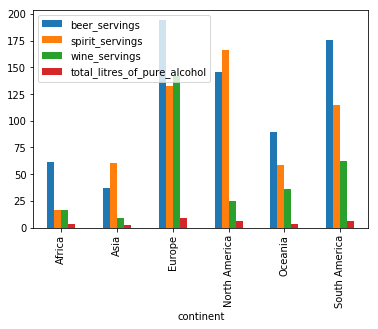

In [63]:
data.plot(kind='bar')

In [64]:
# https://www.ritchieng.com/pandas-exploring-series/
import pandas as pd
url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [65]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [66]:
# basic summary 
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [67]:
# frequency of different genres
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [68]:
# turn raw counts into percentages
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [69]:
type(movies.genre.value_counts(normalize=True))

pandas.core.series.Series

In [70]:
#Hence we can use any Series method such as .head()
#Every time when you run a method, think of what other DataFrame or Series method we can chain
# finding out unique values
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [71]:
# number of unique values
movies.genre.nunique()

16

In [72]:
# crosstab is useful for explorng the data further
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [73]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [74]:
movies.duration.mean()

120.97957099080695

In [75]:
movies.duration.max()

242

In [76]:
movies.duration.min()

64

In [77]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
       ..
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

In [78]:
#Visualization

%matplotlib inline
data = movies.duration
data

0      142
1      175
2      200
3      152
4      154
      ... 
974    116
975    118
976    138
977    114
978    126
Name: duration, Length: 979, dtype: int64

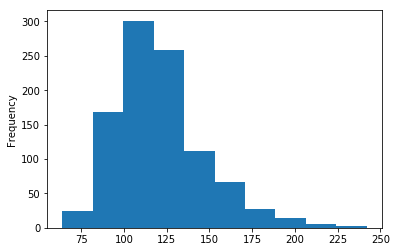

In [79]:
data.plot(kind='hist')

In [80]:
data_counts = movies.genre.value_counts()
data_counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

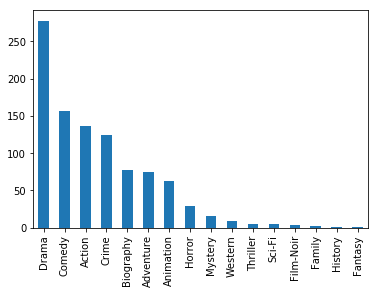

In [81]:
data_counts.plot(kind='bar')